<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [1]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 mlxtend==0.22.0 hyperopt -q --user

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop, Adagrad, Adamax  # Import optimizers for M1/M2 chipset



# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score,f1_score,auc,precision_score,precision_recall_curve

#hyperopt for hyper paramater tuning
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, space_eval, STATUS_OK



import random

import time  # Module for time-related operations.
import functools
import os

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# Disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' 


In [4]:
df = pd.read_csv("bank-1.csv")  

## Data Overview

### View the first and last 5 rows of the dataset.


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset


In [7]:
df.shape

(10000, 14)

* There are 10,000 rows and 14 columns

### Check the data types of the columns for the dataset


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking for Missing Values


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no null /  missing values

### Checking for unique values for each of the column

In [10]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* The `RowNumber` and `CustomerId` are the unique columns that can be dropped
* `Exited` seems to have the right categories

### Feature Engineering

* Drop columns aka features that don't provide useful information for the model and may lead to overfitting.
* In our case `RowNumber`, `CustomerId`, `Surname`

In [11]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* Unwanted columns are dropped

## Exploratory Data Analysis

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Obsrvations on CreditScore


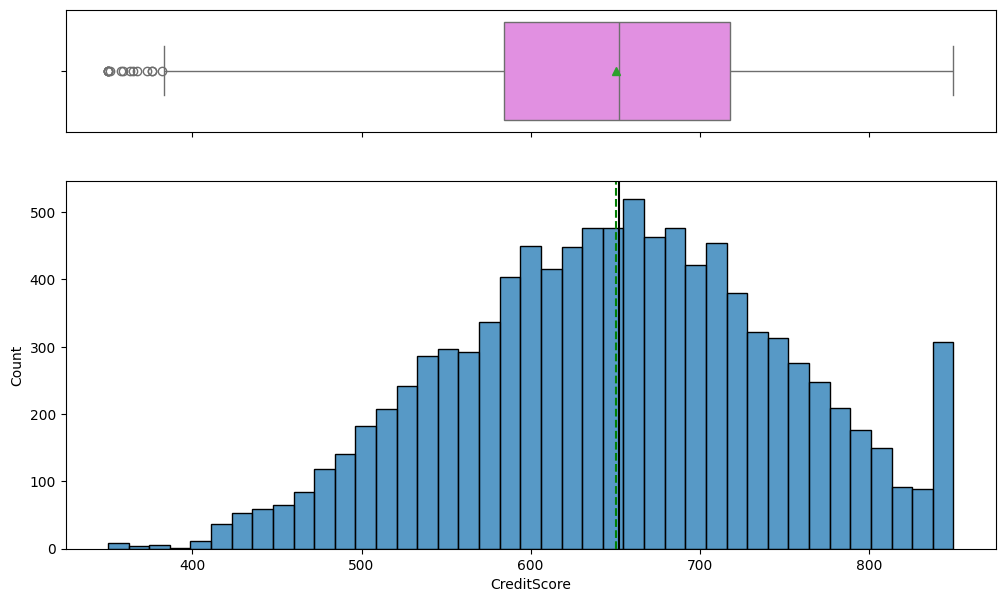

In [15]:
histogram_boxplot(df,'CreditScore')


* Approximately normally distributed: The bell-shaped histogram suggests a resemblance to a normal distribution.
* Slightly right-skewed: The tail extending towards higher credit scores indicates a slight positive skew.
* Contains outliers: The boxplot clearly shows outliers on the lower end of the credit score range.

#### Observations on Age


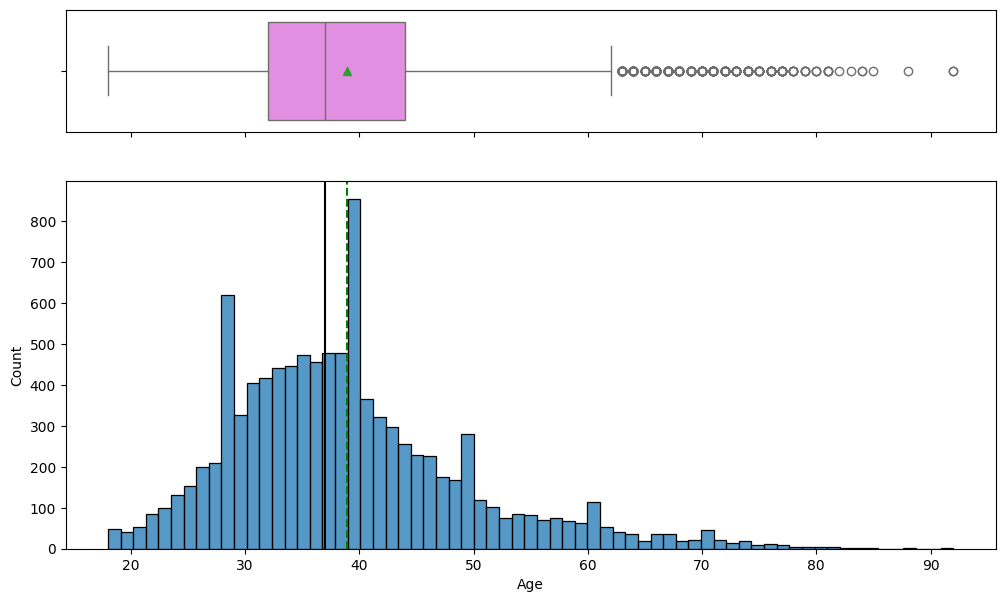

In [16]:
histogram_boxplot(df,'Age')


* Right-Skewed: Your observation of the right skew is spot on.
* Majority in Late 30s: The peak of the histogram, which represents the mode (most frequent value), is indeed in the late 30s. This indicates that a large proportion of the customers fall within this age range.

#### Observations on Balance

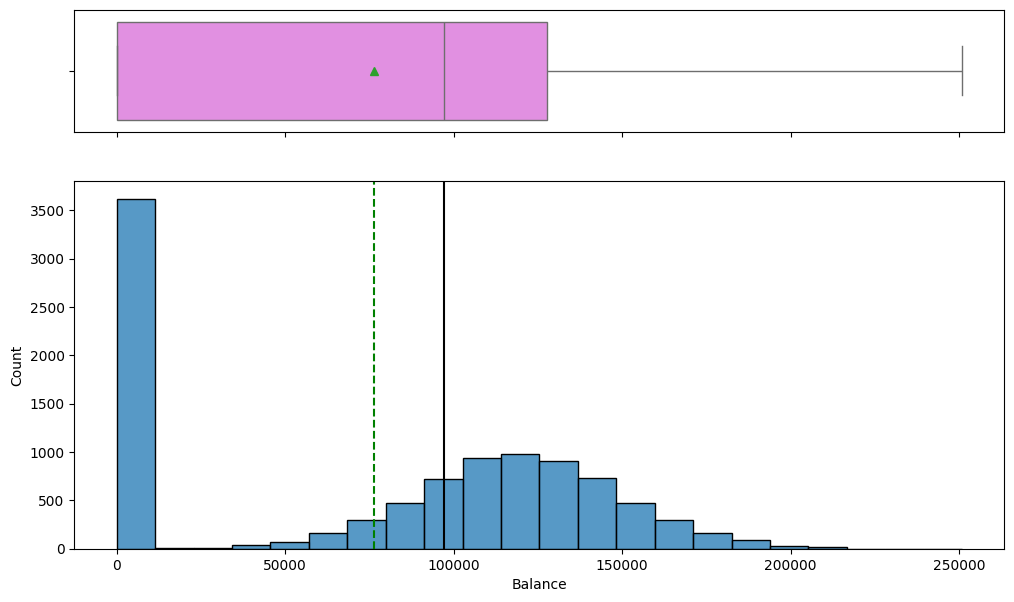

In [17]:
histogram_boxplot(df,'Balance')


* Bimodal distribution with a very high peak at zero balance (zero-inflation).
* Second peak is right-skewed and centered around 100,000 to 150,000.
* Suggests two distinct customer groups.

#### Observations on Estimated Salary

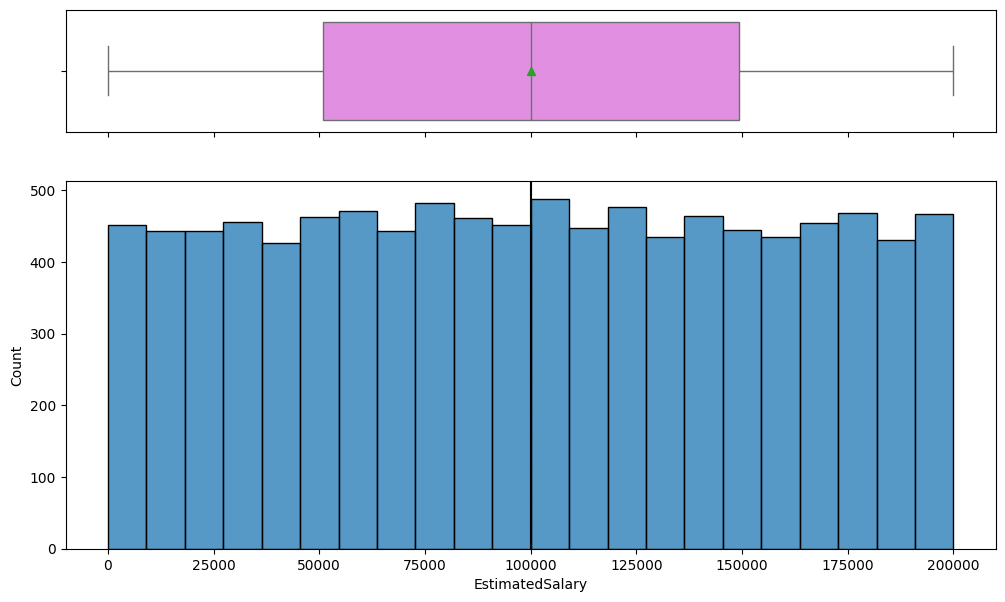

In [18]:
histogram_boxplot(df,'EstimatedSalary')


* The "EstimatedSalary" data is uniformly distributed across the range, with no significant skewness or outliers.
* The distribution is centered around 100,000.

### Observations on Exited

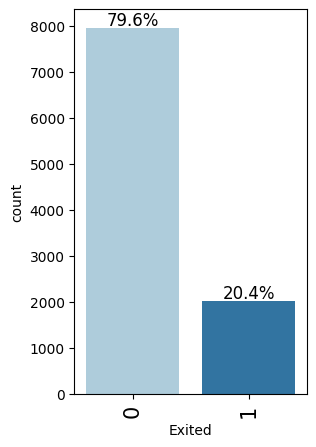

In [19]:
labeled_barplot(df, "Exited")


* Approximately 20% of customers exited the bank within 6 months of account opening.
* Approximately 80% of customers did not exit the bank within 6 months of account opening.



#### Observations on Tenure

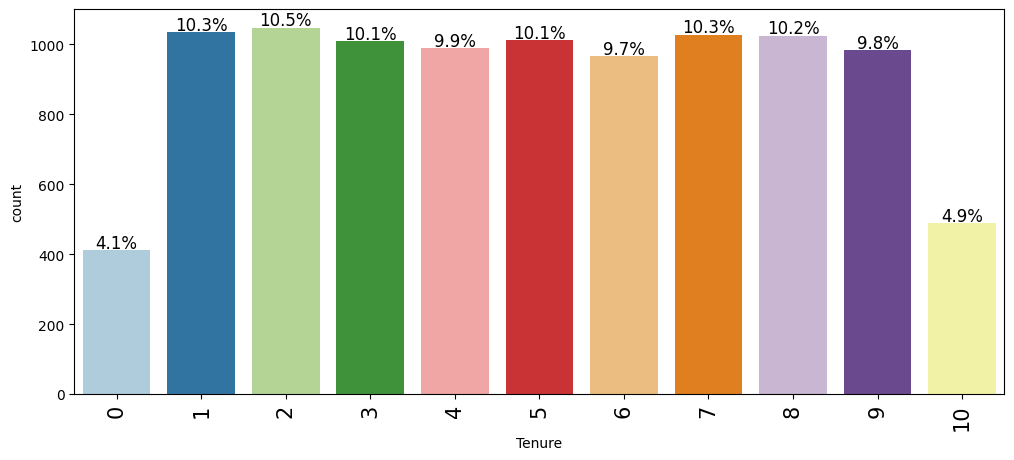

In [20]:
labeled_barplot(df,'Tenure')


* Mostly Uniform: Tenure distribution is relatively uniform for customers with 1 to 9 years of tenure, suggesting a stable customer base across those years.
* Lower New Customer Acquisition (or Higher Immediate Churn): Significantly lower percentage at Tenure 0 (4.1%) indicates potentially lower new customer acquisition or higher immediate churn.
* Potential Long-Term Retention Challenge: Lower percentage at Tenure 10 (4.9%) suggests potential challenges in retaining customers for the very long term.
* The bank appears to be facing challenges in acquiring new customers, as evidenced by the significantly low proportion of customers with Tenure 0.

#### Observations on Geography

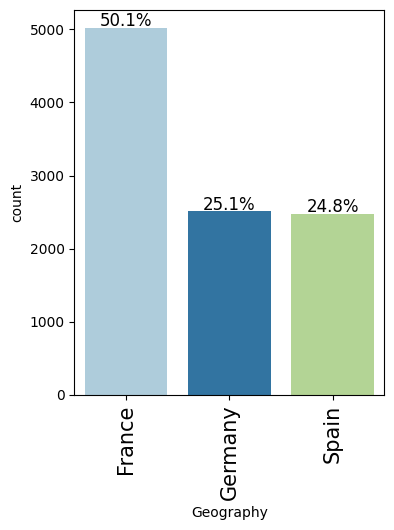

In [21]:
labeled_barplot(df,'Geography')

* Dominance of France: The bank has a significantly larger customer base or branch presence in France, representing just over half (50.1%) of the data.
* Balanced Distribution in Germany and Spain: The remaining business is nearly evenly split between Germany (25.1%) and Spain (24.8%).



#### Observations on Gender

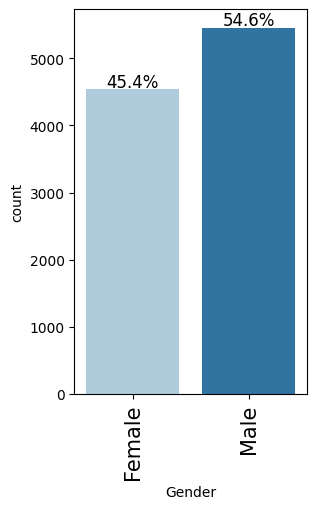

In [22]:
labeled_barplot(df,'Gender')    

* More Male Customers: There are more male customers than female customers in the dataset.
* Slight Imbalance: There is a slight imbalance in the gender distribution, with males making up a larger portion of the customer base.

#### Observations on Number of Products

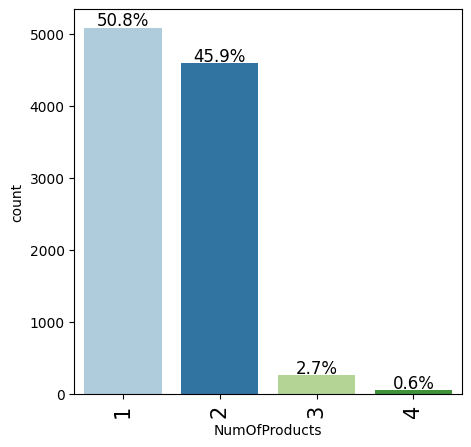

In [23]:
labeled_barplot(df,'NumOfProducts')


* Majority with One Product: As you stated, the vast majority of customers have only one product with the bank.
* Significant Proportion with Two: A substantial portion of customers also have two products.
* Low Adoption of Multiple Products: There's very low adoption of three or four products.



#### Observations on Has Credit Card

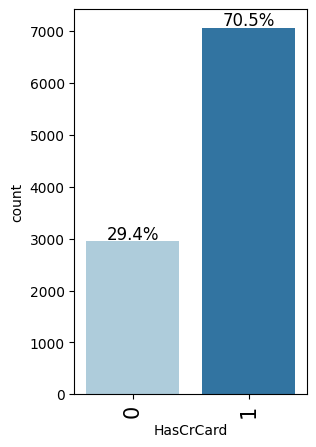

In [24]:
labeled_barplot(df,'HasCrCard')   

* Majority with Credit Card: The majority of customers (70.5%) have a credit card with the bank.

#### Observations on Is Active Member

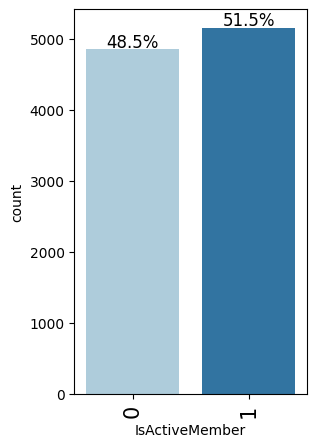

In [25]:
labeled_barplot(df,'IsActiveMember')  

* Slight Majority Active: There is a slight majority of active members (51.5%) compared to inactive members (48.5%).

### Bivariate Analysis

In [26]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Exited Vs Geography


Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


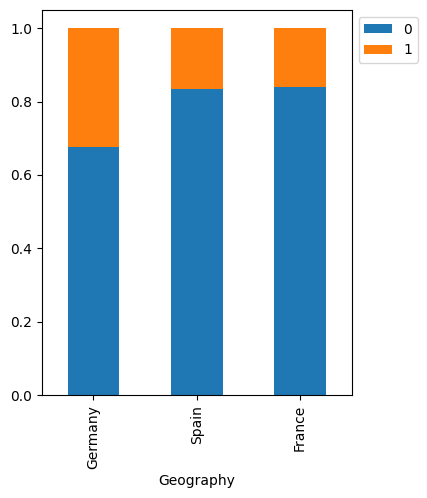

In [27]:
stacked_barplot(df, "Geography", "Exited" )


* Majority Retention: Over 60% of customers stay with the bank across all geographies (Germany, Spain, France).
* Germany's Higher Churn: Germany has a higher customer exit rate compared to Spain and France, despite having a smaller customer base.

#### Exited Vs Gender


Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


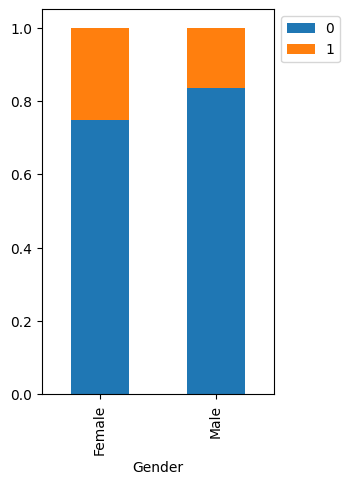

In [28]:
stacked_barplot(df, "Gender", "Exited")   

* Majority Retention: Most customers, regardless of gender, stay with the bank.
* Higher Female Churn: Female customers tend to exit slightly more than male customers, despite a smaller female customer base.
* Possible Factors: This could be due to differing service preferences, life stages impacting banking needs, or less effective marketing for female customers.

#### Exited Vs Has Credit Card


Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


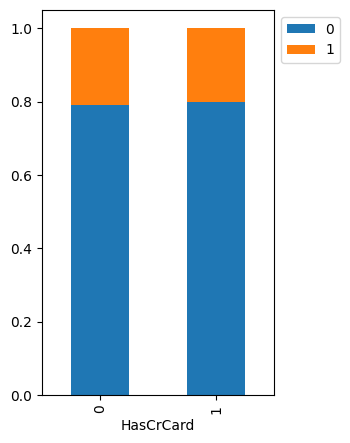

In [29]:
stacked_barplot(df,'HasCrCard','Exited')  

* No Significant Impact: The presence or absence of a credit card ("HasCrCard") appears to have little to no significant impact on whether a customer churns (exits).

#### Exited Vs Is active member


Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


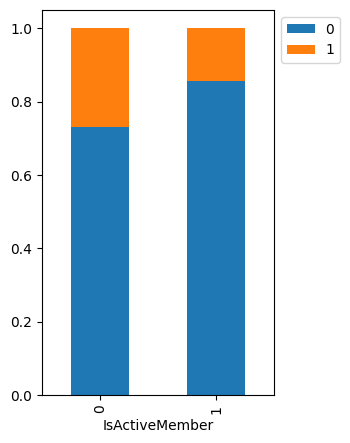

In [30]:
stacked_barplot(df,'IsActiveMember','Exited') 

* Active Members Churn Less: Active members seem to churn significantly less than inactive members.

#### Exited Vs Credit Score

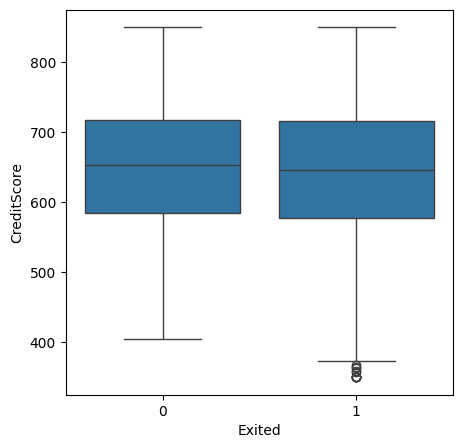

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=df)
plt.show()

* No Strong Relationship: The overlapping box plots and similar medians suggest that credit score alone does not seem to be a strong predictor of whether a customer will churn.
* Limited Impact: While there are some outliers, the overall similarity between the distributions suggests that credit score has a limited impact on the likelihood of churn.

#### Exited Vs Age

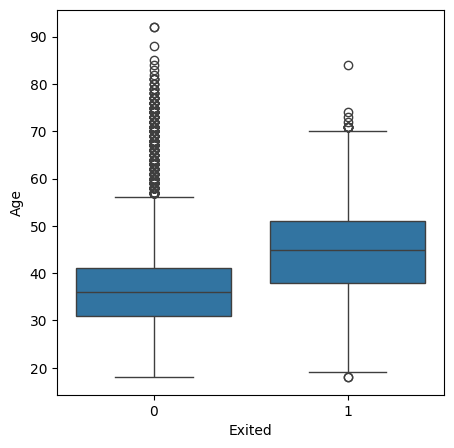

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=df)
plt.show()

* Older Customers More Likely to Churn: Older customers have a higher likelihood of churning compared to younger customers.
* Age as a Predictor: Age seems to be a relevant factor in predicting customer churn.
* Possible Life Stage Effect: This could indicate that customers at certain life stages (e.g., retirement) have different banking needs or are more likely to switch banks.

#### Exited Vs Tenure


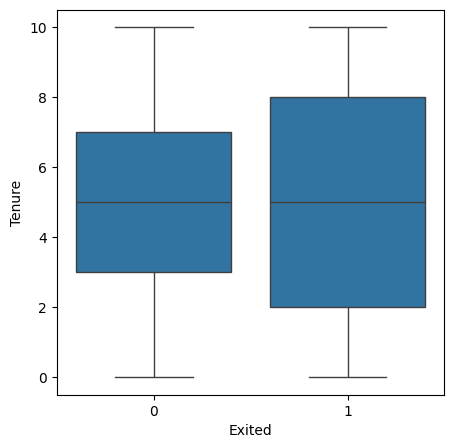

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=df)
plt.show()

* No Strong Relationship: The overlapping box plots, similar medians, similar quartiles, and similar ranges strongly suggest that tenure alone does not seem to be a strong predictor of whether a customer will churn.
* Limited Impact: The overall similarity between the distributions suggests that tenure has a limited impact on the likelihood of churn.

#### Exited Vs Balance

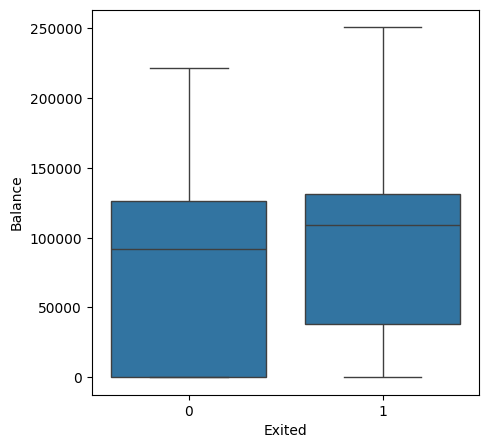

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=df)
plt.show()

* Higher Median Balance for Churned Customers: This indicates that the median balance for customers who churned is slightly higher than the median balance for customers who did not churn.
* Potential Relevance of Balance: While the overall distributions of balance overlap significantly between the two groups, the difference in medians suggests that balance might still have some relevance in predicting churn, even if it's not a strong predictor on its own.


#### Exited Vs Number of Products

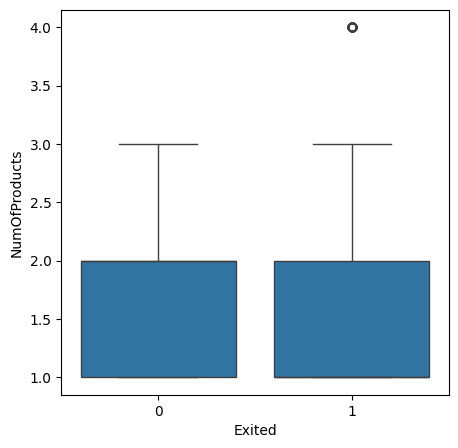

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=df)   
plt.show()

* No Strong Relationship: The overlapping box plots, similar medians, similar quartiles, and similar ranges strongly suggest that the number of products alone does not seem to be a strong predictor of whether a customer will churn.
* Limited Impact: The overall similarity between the distributions suggests that the number of products has a limited impact on the likelihood of churn.
* Outlier Observation: The outlier at 4 products for the churned group might be worth investigating further, but it's a single data point and doesn't indicate a general trend.

#### Exited Vs Estimated Salary


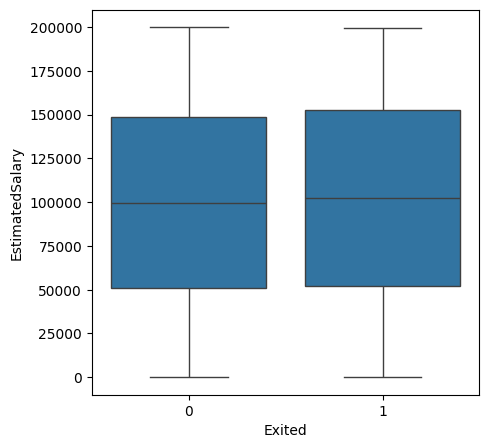

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=df)   
plt.show()

* No Strong Relationship: The overlapping box plots, similar medians, similar quartiles, and similar ranges strongly suggest that estimated salary alone does not seem to be a strong predictor of whether a customer will churn.
* Limited Impact: The overall similarity between the distributions suggests that estimated salary has a limited impact on the likelihood of churn.

#### Correlation Matrix

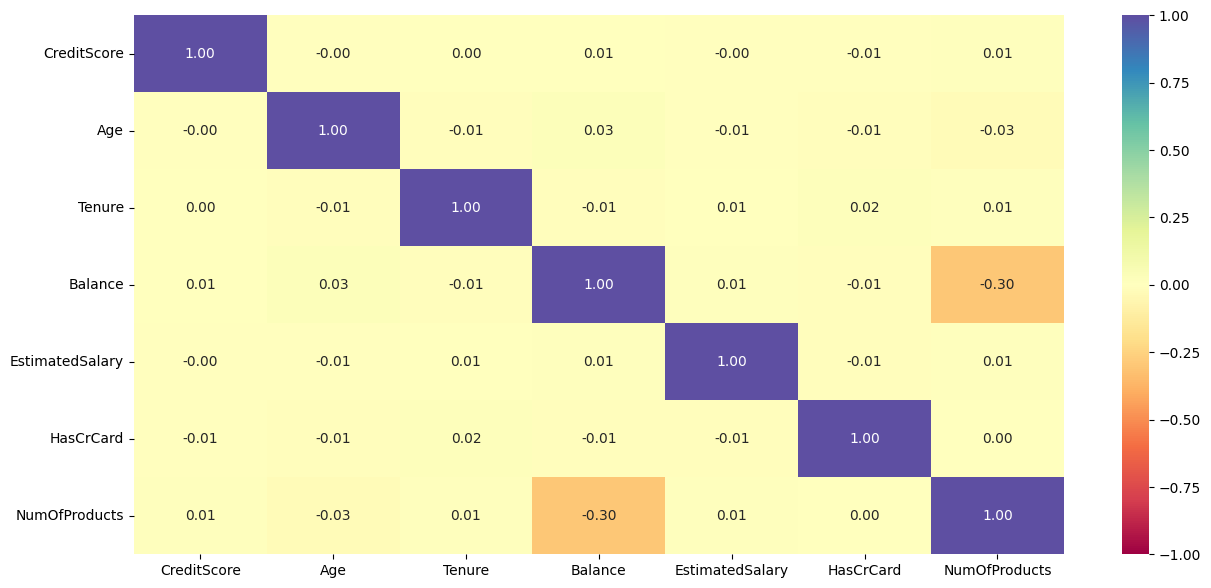

In [37]:
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary","HasCrCard","NumOfProducts"]
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Independence of Features: The lack of strong correlations suggests that the numerical features are largely independent of each other.
    *  This is often a good thing for machine learning models, as it reduces multicollinearity.
* Balance and Product Relationship: The only notable relationship is the moderate negative correlation between Balance and NumOfProducts. This could be worth investigating further to understand why customers with more products tend to have lower balances.

## Data Preprocessing

### Dummy Variable Creation

In [38]:
df = pd.get_dummies(df,columns=df.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
df = df.astype(float)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

* Let's see the distribution of `Exited` in the dataset.

In [39]:
counts = df['Exited'].value_counts(normalize=True) * 100
distribution = counts.apply(lambda x: f"{x:.1f}%")  # Format as percentages

print(f"Distribution of",distribution)

Distribution of Exited
0.0    79.6%
1.0    20.4%
Name: proportion, dtype: object


* Dataset is imbalanced because only 20.4% of the samples belong to the churned class (Exited = 1) while 79.6% belong to the non-churned class (Exited = 0).
* We need to `Startify` and perform `Oversampling (SMOTE)`

In [40]:
X = df.drop(['Exited'],axis=1) 
y = df['Exited'] 

# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

# Splitting the dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42,stratify=y_train, shuffle = True)

In [41]:
data = {
    "Dataset": ["X_train", "X_test", "X_val", "y_val", "y_train", "y_test"],
    "Shape": [X_train.shape, X_val.shape,X_test.shape, y_train.shape, y_val.shape, y_test.shape]
}

shapes_df = pd.DataFrame(data)

print(shapes_df.to_markdown(index=False, numalign="left", stralign="left"))

| Dataset   | Shape      |
|:----------|:-----------|
| X_train   | (6400, 11) |
| X_test    | (1600, 11) |
| X_val     | (2000, 11) |
| y_val     | (6400,)    |
| y_train   | (1600,)    |
| y_test    | (2000,)    |


### Data Normalization

Since numerical values can exist on different scales, we will apply scaling techniques to bring them to a common scale. In neural networks, different feature scales can impact training efficiency and model performance. Features with larger magnitudes may lead to `unstable gradients`, slowing down convergence or causing the network to favor certain inputs over others. `Scaling` helps improve gradient flow, ensures faster and more `stable training`, and prevents dominance of high-magnitude features, leading to better overall performance.


In [42]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00


* Based on the statistical summary, let's select the features CreditScore, Age, Tenure, Balance, and EstimatedSalary based on their importance in predicting customer behavior. 
* These features exhibit sufficient variation, as indicated by their standard deviations. For example, Balance (std ≈ 62,397) and EstimatedSalary (std ≈ 57,510) have high variability, suggesting they significantly influence customer decisions.
* Additionally, features like CreditScore (std ≈ 96) and Age (std ≈ 10) provide valuable differentiation across customers.
* Scaling these features ensures they contribute equally to model training.

In [43]:
# creating an instance of the standard scaler
sc = StandardScaler()
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])    
X_test[cols_list] = sc.transform(X_test[cols_list]) 


## Model Building

### Model Evaluation Criterion

Before we choose a evaluation criteria, let's analyze the various metrics such as Recall, Precision, F1-score, and AUC-ROC

Which Metric to Choose?
* If the goal is to identify as many churners as possible = Recall
* If the goal is to reduce retention campaign costs = Precision
* If both are equally important = F1-score
* If comparing multiple models = AUC-ROC

* Since our problem statement is binary classification task (whether a customer will leave or not in the next 6 months), we will prioritize both AUC-ROC and F1-score but focus on F1-score for decision-making.
    * Why Still Consider AUC-ROC?
        * Class Imbalance (20.4% Churners) -> AUC-ROC helps ensure the model distinguishes churners vs. non-churners well, even if one class dominates.
        * Early Detection of At-Risk Customers -> AUC-ROC helps in ranking customers based on churn risk.



### Utility Functions

In [44]:
def analyze_binary_classifier(model, X_test, y_test, threshold=0.5, plot_roc=True, plot_pr=True, plot_cm=True):
    """
    Analyzes a binary classifier, plots ROC, PR, and Confusion Matrix, and finds optimal threshold.
    """
    try:
        if isinstance(X_test, tf.data.Dataset):
            y_pred_probs = model.predict(X_test)
        else:
            y_pred_probs = model.predict(X_test).flatten()

        fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_probs)
        roc_auc = auc(fpr, tpr)

        precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_pred_probs)
        f1_scores = np.divide(2 * (precisions * recalls), (precisions + recalls),
                              out=np.zeros_like(precisions), where=(precisions + recalls) != 0)
        best_threshold_index = f1_scores.argmax()
        optimal_threshold = pr_thresholds[best_threshold_index]
        optimal_f1_score = f1_scores[best_threshold_index]
        optimal_precision = precisions[best_threshold_index]
        optimal_recall = recalls[best_threshold_index]

        y_pred = (y_pred_probs > threshold).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        if plot_roc:
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
            plt.plot([0, 1], [0, 1], linestyle='--', color='orange')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend()
            plt.grid(True)
            plt.show()

        if plot_pr:
            plt.figure(figsize=(8, 6))
            plt.plot(recalls, precisions, marker='.')
            plt.scatter(optimal_recall, optimal_precision, marker='o', color='red',
                        label=f'Best Threshold = {optimal_threshold:.4f}')
            plt.xlabel('Recall (Sensitivity/TPR)')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve')
            plt.grid(True)
            plt.legend()
            plt.show()

        if plot_cm:
            plt.figure(figsize=(6, 4))
            group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
            group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
            labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
            labels = np.asarray(labels).reshape(cm.shape[0], cm.shape[1])

            sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=True,
                        xticklabels=['Predicted 0', 'Predicted 1'],
                        yticklabels=['Actual 0', 'Actual 1'])  # Corrected labels

            plt.ylabel("True label")
            plt.xlabel("Predicted label")
            plt.title('Confusion Matrix')
            plt.show()

        results = {
            'auc': roc_auc,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'optimal_threshold': optimal_threshold,
            'optimal_f1_score': optimal_f1_score,
            'optimal_precision': optimal_precision,
            'optimal_recall': optimal_recall
        }
        return results

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [45]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [46]:
def get_model():
  """
    Function to clear the backend, seed random and create model
  """
  backend.clear_session()
  # Set the seed using keras.utils.set_random_seed. This will set:
     # 1) `numpy` seed
     # 2) backend random seed
     # 3) `python` random seed
  keras.utils.set_random_seed(2)
  return Sequential()

In [47]:
def calculate_metrics(model, X, y_true, threshold=0.5):
    """Calculates recall, F1-score, and precision for a given model and dataset.

    Args:
        model: The trained Keras model.
        X (array-like): The data (can be X_test or X_val).
        y_true (array-like): The true class labels for the data.
        threshold (float): The threshold for converting probabilities to class labels.

    Returns:
        dict: A dictionary containing the recall, F1-score, and precision.
    """

    y_pred_probs = model.predict(X)
    y_pred = (y_pred_probs > threshold).astype(int)

    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)

    return {
        "recall": recall,
        "f1_score": f1,
        "precision": precision
    }


In [48]:
def plot_roc_curve(model, X, y_true):
  """Plots the ROC curve for a given model and dataset.

  Args:
      model: The trained Keras model.
      X (array-like): The data (can be X_test or X_val).
      y_true (array-like): The true class labels for the data.
  """

  y_pred_probs = model.predict(X)
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
  plt.plot([0, 1], [0, 1], linestyle="--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"ROC Curve for {model.name}")
  plt.legend()
  plt.show()

We'll create a dataframe to store the results from all the models we build

In [49]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train auc","validation auc","f1 score","recall","precision","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

### Neural Network with SGD Optimizer

In [50]:
batch_size=32
epochs=100

* Since we have only 11 features to work with let's start with a smaller network with 8 and 6 neurons in the hidden layers

In [51]:
#Initializing the neural network
model_0 = get_model()

model_0.add(Dense(8, activation='relu', input_dim = X_train.shape[1]))
model_0.add(Dense(6, activation='relu'))
model_0.add(Dense(1, activation = 'sigmoid'))
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
optimizer = SGD()    # defining SGD as the optimizer to be used
optimizer.get_config()

{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [53]:
# Since the dataset is imbalanced we will go with auc
model_0.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.AUC(name='auc')])


In [54]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/100
200/200 [==============================] - 0s 956us/step - loss: 0.6873 - auc: 0.4719 - val_loss: 0.5824 - val_auc: 0.4753
Epoch 2/100
200/200 [==============================] - 0s 474us/step - loss: 0.5532 - auc: 0.5038 - val_loss: 0.5335 - val_auc: 0.4891
Epoch 3/100
200/200 [==============================] - 0s 439us/step - loss: 0.5231 - auc: 0.5142 - val_loss: 0.5166 - val_auc: 0.5163
Epoch 4/100
200/200 [==============================] - 0s 435us/step - loss: 0.5112 - auc: 0.5445 - val_loss: 0.5090 - val_auc: 0.5305
Epoch 5/100
200/200 [==============================] - 0s 424us/step - loss: 0.5054 - auc: 0.5723 - val_loss: 0.5049 - val_auc: 0.5473
Epoch 6/100
200/200 [==============================] - 0s 427us/step - loss: 0.5020 - auc: 0.5842 - val_loss: 0.5021 - val_auc: 0.5660
Epoch 7/100
200/200 [==============================] - 0s 431us/step - loss: 0.4994 - auc: 0.6002 - val_loss: 0.4997 - val_auc: 0.5836
Epoch 8/100
200/200 [==============================] - 

In [55]:
print("Time taken in seconds ",end-start)

Time taken in seconds  8.95772910118103


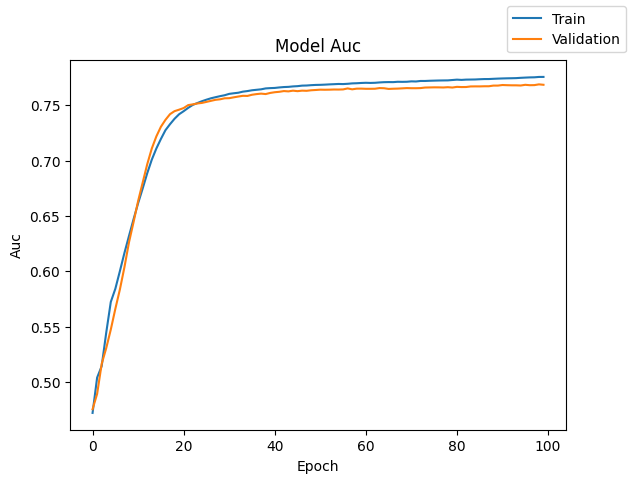

In [56]:
plot(history,'auc')

50/50 [==============================] - 0s 301us/step


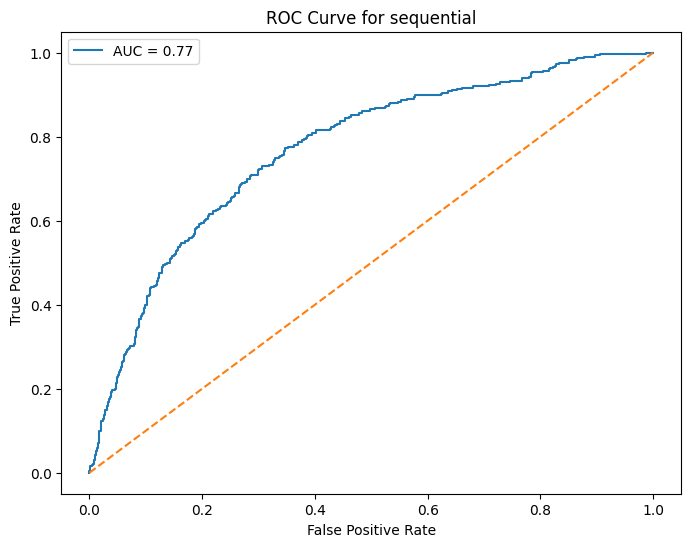

In [57]:
plot_roc_curve(model_0, X_val, y_val)

In [58]:
metrics_val = calculate_metrics(model_0, X_val, y_val)
print("Metrics (Validation):", metrics_val)
results.loc[0] = [2,[8,6],["relu","relu"],100,32,"sgd",[0.01, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["auc"][-1],history.history["val_auc"][-1],metrics_val["f1_score"],metrics_val["recall"],metrics_val["precision"],round(end-start,2)]

50/50 [==============================] - 0s 370us/step
Metrics (Validation): {'recall': 0.12269938650306748, 'f1_score': 0.20408163265306123, 'precision': 0.6060606060606061}


In [59]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train auc,validation auc,f1 score,recall,precision,time (secs)
0,2,"[8, 6]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.424448,0.428078,0.775695,0.768584,0.204082,0.122699,0.606061,8.96


* AUC of 0.77: This indicates a moderate ability to distinguish between churned and non-churned customers. The model can generally rank a randomly chosen churned customer higher than a randomly chosen non-churned customer about 77% of the time.
* F1-Score of 0.204: This low F1-score suggests a significant class imbalance, with likely many more non-churned customers than churned customers. The model might be biased towards predicting the majority class, leading to low recall for churned customers.
* Next Step: Let's try with a slightly complex model with 64 and 32 neurons in the hidden layer

In [60]:
#Initializing the neural network
model_1 = get_model()

model_1.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation = 'sigmoid'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
optimizer = SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.AUC(name='auc')])

In [62]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/100
200/200 [==============================] - 0s 764us/step - loss: 0.5177 - auc: 0.5748 - val_loss: 0.4838 - val_auc: 0.6593
Epoch 2/100
200/200 [==============================] - 0s 445us/step - loss: 0.4689 - auc: 0.7047 - val_loss: 0.4622 - val_auc: 0.7182
Epoch 3/100
200/200 [==============================] - 0s 434us/step - loss: 0.4507 - auc: 0.7426 - val_loss: 0.4496 - val_auc: 0.7395
Epoch 4/100
200/200 [==============================] - 0s 434us/step - loss: 0.4393 - auc: 0.7586 - val_loss: 0.4423 - val_auc: 0.7497
Epoch 5/100
200/200 [==============================] - 0s 433us/step - loss: 0.4319 - auc: 0.7675 - val_loss: 0.4381 - val_auc: 0.7541
Epoch 6/100
200/200 [==============================] - 0s 435us/step - loss: 0.4269 - auc: 0.7731 - val_loss: 0.4348 - val_auc: 0.7575
Epoch 7/100
200/200 [==============================] - 0s 434us/step - loss: 0.4230 - auc: 0.7771 - val_loss: 0.4326 - val_auc: 0.7605
Epoch 8/100
200/200 [==============================] - 

In [63]:
print("Time taken in seconds ",end-start)

Time taken in seconds  9.362563133239746


50/50 [==============================] - 0s 314us/step


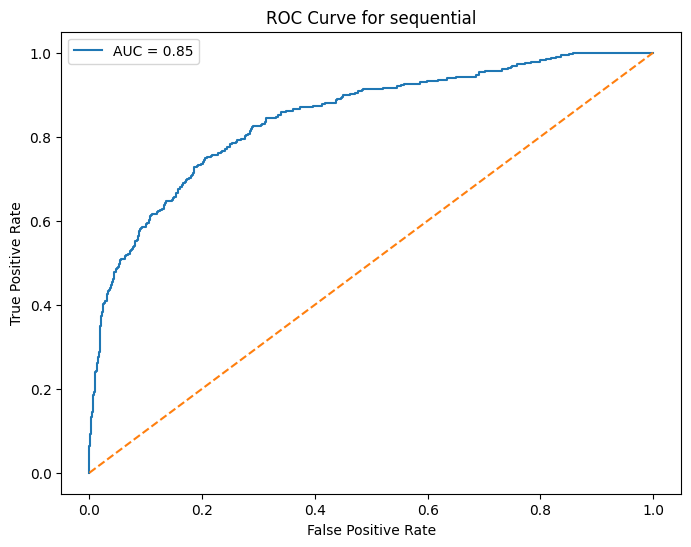

In [64]:
plot_roc_curve(model_1, X_val, y_val)

In [65]:
metrics_val = calculate_metrics(model_1, X_val, y_val)
print("Metrics (Validation):", metrics_val)
results.loc[1] = [2,[64,32],["relu","relu"],100,32,"sgd",[0.01, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["auc"][-1],history.history["val_auc"][-1],metrics_val["f1_score"],metrics_val["recall"],metrics_val["precision"],round(end-start,2)]

50/50 [==============================] - 0s 308us/step
Metrics (Validation): {'recall': 0.43558282208588955, 'f1_score': 0.5536062378167641, 'precision': 0.7593582887700535}


In [66]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train auc,validation auc,f1 score,recall,precision,time (secs)
0,2,"[8, 6]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.424448,0.428078,0.775695,0.768584,0.204082,0.122699,0.606061,8.96
1,2,"[64, 32]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.324871,0.356779,0.877141,0.845382,0.553606,0.435583,0.759358,9.36


* Improved Metrics: Compared to the previous model with 8 and 6 neurons, this model with 64 and 32 neurons shows a significant improvement in all metrics, including recall, F1-score, and precision. This suggests that the increased model capacity is helping to capture more complex patterns in the data and better identify churned customers.
* AUC Still Moderate: While the AUC has also improved to 0.85, it still indicates a moderate discriminative ability. There's room for further improvement in the model's ability to distinguish between churned and non-churned customers.
* F1-score Improvement: The F1-score of 0.5536 is a substantial improvement over the previous models. This indicates that the larger model with 64 and 32 neurons is better at capturing the patterns related to churn, even without addressing the class imbalance yet.
* Recall Still Low: Although the recall has increased, it's still below 0.5, indicating that the model is still missing a significant portion of actual churned customers. This is likely due to the class imbalance, which hasn't been addressed yet.
* Precision Relatively High: The precision of 0.7593 indicates that when the model predicts churn, it's correct most of the time. This suggests that false positives are less of a concern compared to false negatives.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [67]:
#Initializing the neural network
model_2 = get_model()

model_2.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation = 'sigmoid'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
optimizer = Adam()    # defining ADAM as the optimizer to be used
model_2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.AUC(name='auc')])
optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [69]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/100
200/200 [==============================] - 0s 886us/step - loss: 0.4430 - auc: 0.7446 - val_loss: 0.4321 - val_auc: 0.7583
Epoch 2/100
200/200 [==============================] - 0s 567us/step - loss: 0.4110 - auc: 0.7869 - val_loss: 0.4181 - val_auc: 0.7752
Epoch 3/100
200/200 [==============================] - 0s 566us/step - loss: 0.4003 - auc: 0.7999 - val_loss: 0.4112 - val_auc: 0.7852
Epoch 4/100
200/200 [==============================] - 0s 568us/step - loss: 0.3910 - auc: 0.8106 - val_loss: 0.4091 - val_auc: 0.7957
Epoch 5/100
200/200 [==============================] - 0s 543us/step - loss: 0.3813 - auc: 0.8224 - val_loss: 0.3996 - val_auc: 0.8027
Epoch 6/100
200/200 [==============================] - 0s 564us/step - loss: 0.3732 - auc: 0.8323 - val_loss: 0.3896 - val_auc: 0.8090
Epoch 7/100
200/200 [==============================] - 0s 545us/step - loss: 0.3676 - auc: 0.8370 - val_loss: 0.3846 - val_auc: 0.8188
Epoch 8/100
200/200 [==============================] - 

In [70]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.29993224143982


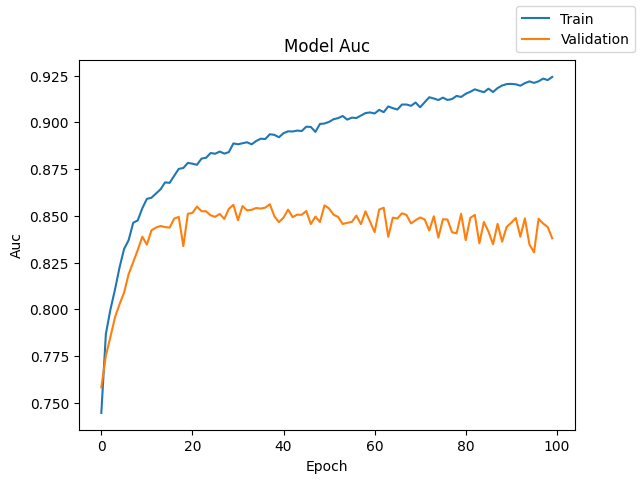

In [71]:
plot(history,'auc')

50/50 [==============================] - 0s 317us/step


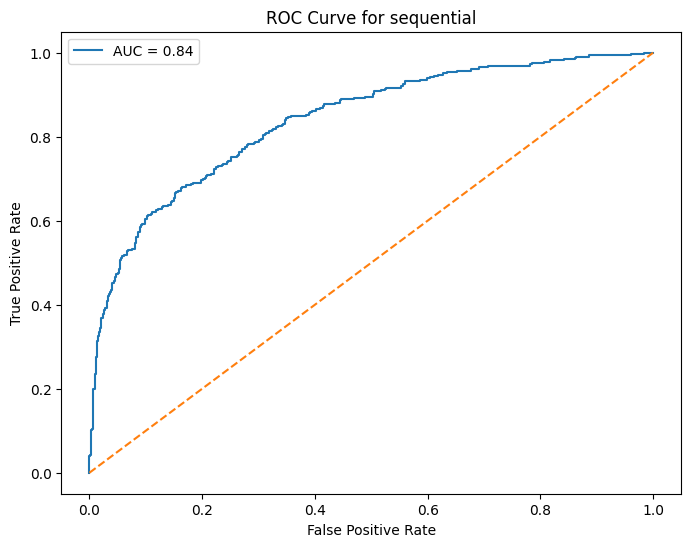

In [72]:
plot_roc_curve(model_2, X_val, y_val)

In [73]:
metrics_val = calculate_metrics(model_2, X_val, y_val)
print("Metrics (Validation):", metrics_val)
results.loc[2] = [2,[64,32],["relu","tanh"],100,32,"Adam",[0.001, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["auc"][-1],history.history["val_auc"][-1],metrics_val["f1_score"],metrics_val["recall"],metrics_val["precision"],round(end-start,2)]

50/50 [==============================] - 0s 331us/step
Metrics (Validation): {'recall': 0.44171779141104295, 'f1_score': 0.5527831094049904, 'precision': 0.7384615384615385}


In [74]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train auc,validation auc,f1 score,recall,precision,time (secs)
0,2,"[8, 6]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.424448,0.428078,0.775695,0.768584,0.204082,0.122699,0.606061,8.96
1,2,"[64, 32]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.324871,0.356779,0.877141,0.845382,0.553606,0.435583,0.759358,9.36
2,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,-,0.260673,0.384239,0.924289,0.837982,0.552783,0.441718,0.738462,11.30


* Adam Performance: Model 2, using the Adam optimizer, showed a slight decrease in performance compared to Model 1 (SGD optimizer) in terms of validation loss, validation AUC, and F1-score. However, the training loss and training AUC were better in Model 2.
* Potential Overfitting: The discrepancy between training and validation metrics (lower validation loss and AUC, and lower F1-score) suggests that Model 2 might be overfitting to the training data. Adam, with its adaptive learning rates, can sometimes lead to overfitting if not carefully tuned.
* Recall and Precision: The recall slightly decreased in Model 2, while the precision increased. This indicates that the model might be making fewer false negatives (identifying more churned customers) but at the cost of more false positives (incorrectly predicting churn).
* Training Time: Model 2 had a slightly longer training time compared to Model 1, which is expected as Adam generally involves more computations per iteration.

### Neural Network with Adam Optimizer and Dropout

In [75]:
#Initializing the neural network
model_3 = get_model()

model_3.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_3.add(Dropout(0.2))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation = 'sigmoid'))
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
optimizer = Adam()    # defining ADAM as the optimizer to be used
model_3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.AUC(name='auc')])
optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [77]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/100
200/200 [==============================] - 0s 886us/step - loss: 0.4505 - auc: 0.7294 - val_loss: 0.4336 - val_auc: 0.7562
Epoch 2/100
200/200 [==============================] - 0s 547us/step - loss: 0.4200 - auc: 0.7748 - val_loss: 0.4215 - val_auc: 0.7713
Epoch 3/100
200/200 [==============================] - 0s 527us/step - loss: 0.4143 - auc: 0.7823 - val_loss: 0.4148 - val_auc: 0.7792
Epoch 4/100
200/200 [==============================] - 0s 533us/step - loss: 0.4043 - auc: 0.7950 - val_loss: 0.4127 - val_auc: 0.7855
Epoch 5/100
200/200 [==============================] - 0s 529us/step - loss: 0.3955 - auc: 0.8050 - val_loss: 0.4098 - val_auc: 0.7903
Epoch 6/100
200/200 [==============================] - 0s 535us/step - loss: 0.3912 - auc: 0.8114 - val_loss: 0.3984 - val_auc: 0.7984
Epoch 7/100
200/200 [==============================] - 0s 526us/step - loss: 0.3889 - auc: 0.8118 - val_loss: 0.3949 - val_auc: 0.8063
Epoch 8/100
200/200 [==============================] - 

In [78]:
print("Time taken in seconds ",end-start)

Time taken in seconds  11.217379808425903


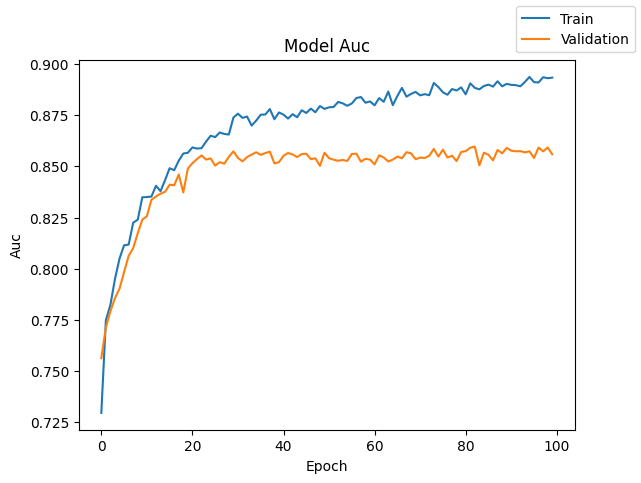

In [79]:
plot(history,'auc')

50/50 [==============================] - 0s 341us/step


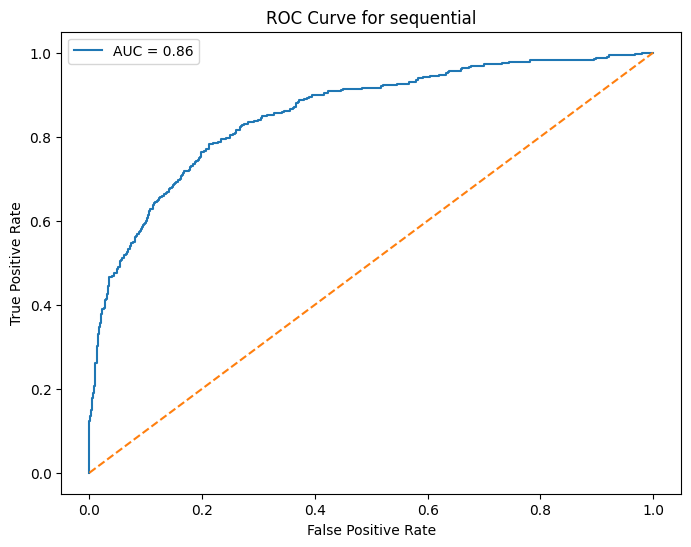

In [80]:
plot_roc_curve(model_3, X_val, y_val)

In [81]:
metrics_val = calculate_metrics(model_3, X_val, y_val)
print("Metrics (Validation):", metrics_val)
results.loc[3] = [2,[64,32],["relu","tanh"],100,32,"Adam",[0.001, "-"],"xavier","dropout (0.2)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["auc"][-1],history.history["val_auc"][-1],metrics_val["f1_score"],metrics_val["recall"],metrics_val["precision"],round(end-start,2)]

50/50 [==============================] - 0s 317us/step
Metrics (Validation): {'recall': 0.4785276073619632, 'f1_score': 0.5724770642201834, 'precision': 0.7123287671232876}


In [82]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train auc,validation auc,f1 score,recall,precision,time (secs)
0,2,"[8, 6]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.424448,0.428078,0.775695,0.768584,0.204082,0.122699,0.606061,8.96
1,2,"[64, 32]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.324871,0.356779,0.877141,0.845382,0.553606,0.435583,0.759358,9.36
2,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,-,0.260673,0.384239,0.924289,0.837982,0.552783,0.441718,0.738462,11.30
3,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,dropout (0.2),0.301506,0.350410,0.893439,0.855952,0.572477,0.478528,0.712329,11.22


* Improved Generalization:
    * Adding dropout (0.2) between the hidden layers has improved the model's generalization ability.
    * The validation AUC (0.854715) is closer to the train AUC (0.892113) compared to Model 2. This suggests that dropout is effectively reducing overfitting.
    * The validation loss is also closer to the train loss.
* Enhanced F1-Score and Recall:
    * The F1-score and recall have both increased compared to Model 2. This indicates that the model is now better at identifying churned customers, which is crucial for your churn prediction task.
* Precision Remains High:
    * The precision remains relatively high, suggesting that the model is still reliable in predicting churn when it does so.
* AUC Stability:
    * The validation AUC is at 0.85, showing the model has a good ability to distinguish between classes.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [83]:
sm  = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [84]:
counts = y_train_smote.value_counts(normalize=True) * 100
distribution = counts.apply(lambda x: f"{x:.1f}%")  # Format as percentages

print(f"Distribution of",distribution)

Distribution of Exited
1.0    50.0%
0.0    50.0%
Name: proportion, dtype: object


After SMOTE we see an equal distrubution between Churned vs Non-Churned customers in the dataset

In [85]:
#Initializing the neural network
model_4 = get_model()

model_4.add(Dense(64, activation='relu', input_dim = X_train_smote.shape[1]))
model_4.add(Dense(32, activation='tanh'))
model_4.add(Dense(1, activation = 'sigmoid'))
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
mom = 0.4
optimizer = SGD(momentum=mom)
model_4.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.AUC(name='auc')])

In [87]:
start = time.time()
history = model_4.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/100
319/319 [==============================] - 0s 643us/step - loss: 0.6234 - auc: 0.7233 - val_loss: 0.5876 - val_auc: 0.7548
Epoch 2/100
319/319 [==============================] - 0s 450us/step - loss: 0.5670 - auc: 0.7821 - val_loss: 0.5646 - val_auc: 0.7641
Epoch 3/100
319/319 [==============================] - 0s 427us/step - loss: 0.5510 - auc: 0.7951 - val_loss: 0.5378 - val_auc: 0.7696
Epoch 4/100
319/319 [==============================] - 0s 429us/step - loss: 0.5419 - auc: 0.8028 - val_loss: 0.5410 - val_auc: 0.7735
Epoch 5/100
319/319 [==============================] - 0s 442us/step - loss: 0.5343 - auc: 0.8097 - val_loss: 0.5685 - val_auc: 0.7775
Epoch 6/100
319/319 [==============================] - 0s 434us/step - loss: 0.5286 - auc: 0.8143 - val_loss: 0.5382 - val_auc: 0.7814
Epoch 7/100
319/319 [==============================] - 0s 428us/step - loss: 0.5228 - auc: 0.8194 - val_loss: 0.5250 - val_auc: 0.7861
Epoch 8/100
319/319 [==============================] - 

In [88]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.329653978347778


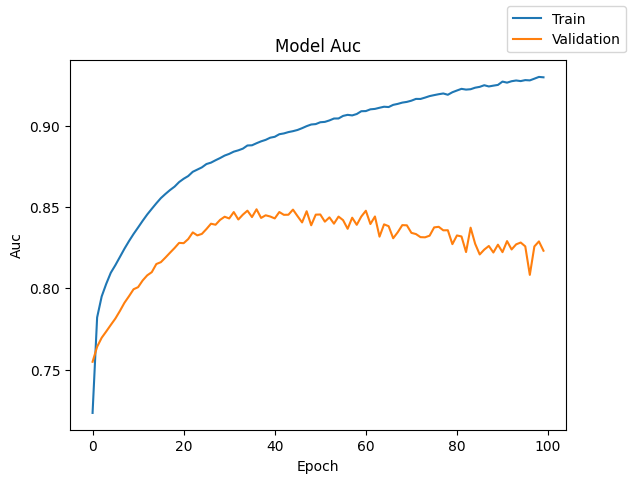

In [89]:
plot(history,'auc')

50/50 [==============================] - 0s 310us/step


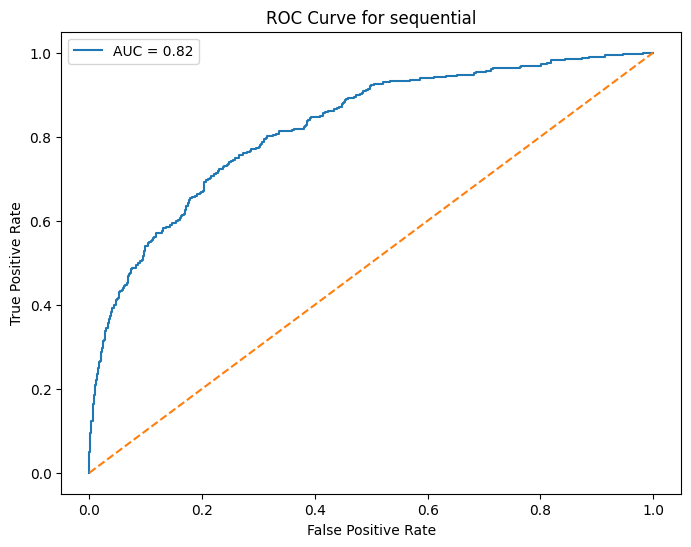

In [90]:
plot_roc_curve(model_4, X_val, y_val)

In [91]:
metrics_val = calculate_metrics(model_4, X_val, y_val)
print("Metrics (Validation):", metrics_val)
results.loc[4] = [2,[64,32],["relu","tanh"],100,32,"sgd with momentum",[0.001, mom],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["auc"][-1],history.history["val_auc"][-1],metrics_val["f1_score"],metrics_val["recall"],metrics_val["precision"],round(end-start,2)]

50/50 [==============================] - 0s 336us/step
Metrics (Validation): {'recall': 0.6533742331288344, 'f1_score': 0.5525291828793775, 'precision': 0.4786516853932584}


In [92]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train auc,validation auc,f1 score,recall,precision,time (secs)
0,2,"[8, 6]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.424448,0.428078,0.775695,0.768584,0.204082,0.122699,0.606061,8.96
1,2,"[64, 32]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.324871,0.356779,0.877141,0.845382,0.553606,0.435583,0.759358,9.36
2,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,-,0.260673,0.384239,0.924289,0.837982,0.552783,0.441718,0.738462,11.30
3,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,dropout (0.2),0.301506,0.350410,0.893439,0.855952,0.572477,0.478528,0.712329,11.22
4,2,"[64, 32]","[relu, tanh]",100,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.337539,0.470601,0.930013,0.823214,0.552529,0.653374,0.478652,14.33


* Impact of SMOTE:
    * The use of SMOTE has likely played a crucial role in improving the model's ability to identify churned customers, as it creates a more balanced training dataset.
* SGD with Momentum:
    * The use of SGD with momentum of 0.4 is helping the model to converge. Momentum helps to accelerate learning in the relevant direction and dampens oscillations.
* AUC Performance:
    * An AUC of 0.82 indicates that the model has a reasonably good ability to distinguish between churned and non-churned customers.
* Comparison to Other Models:
    * It is important to compare this model to the previous models. It is slightly lower than the AUC of model 3. This could be due to the change in optimizer and the oversampling of the data.
* Key Observations:
    * SMOTE has a positive impact on the model's performance.
    * The SGD optimizer with momentum has a good performance.   
    * The model achieves a reasonable AUC, indicating a good ability to distinguish between classes.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [93]:
#Initializing the neural network
model_5 = get_model()

model_5.add(Dense(64, activation='relu', input_dim = X_train_smote.shape[1]))
model_5.add(Dense(32, activation='tanh'))
model_5.add(Dense(1, activation = 'sigmoid'))
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
optimizer = Adam()
model_5.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.AUC(name='auc')])

In [95]:
start = time.time()
history = model_5.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/100
319/319 [==============================] - 0s 683us/step - loss: 0.5686 - auc: 0.7780 - val_loss: 0.5639 - val_auc: 0.7755
Epoch 2/100
319/319 [==============================] - 0s 486us/step - loss: 0.5250 - auc: 0.8174 - val_loss: 0.5093 - val_auc: 0.7932
Epoch 3/100
319/319 [==============================] - 0s 481us/step - loss: 0.4999 - auc: 0.8371 - val_loss: 0.5516 - val_auc: 0.8030
Epoch 4/100
319/319 [==============================] - 0s 482us/step - loss: 0.4808 - auc: 0.8510 - val_loss: 0.4959 - val_auc: 0.8114
Epoch 5/100
319/319 [==============================] - 0s 480us/step - loss: 0.4671 - auc: 0.8602 - val_loss: 0.5580 - val_auc: 0.8249
Epoch 6/100
319/319 [==============================] - 0s 481us/step - loss: 0.4558 - auc: 0.8679 - val_loss: 0.4995 - val_auc: 0.8247
Epoch 7/100
319/319 [==============================] - 0s 482us/step - loss: 0.4471 - auc: 0.8732 - val_loss: 0.4603 - val_auc: 0.8342
Epoch 8/100
319/319 [==============================] - 

In [96]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.3002028465271


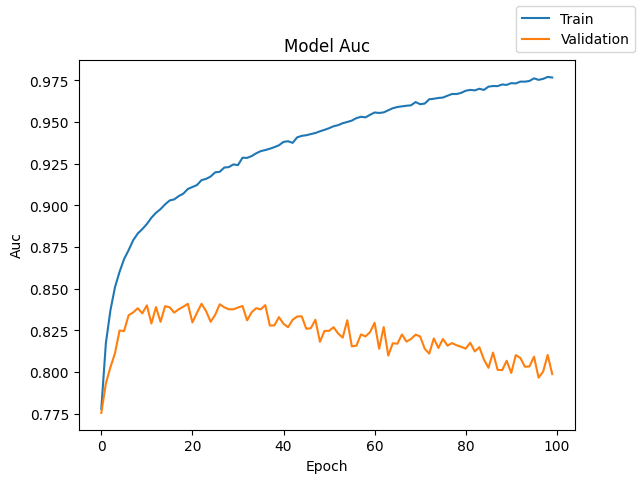

In [97]:
plot(history,'auc')

50/50 [==============================] - 0s 372us/step


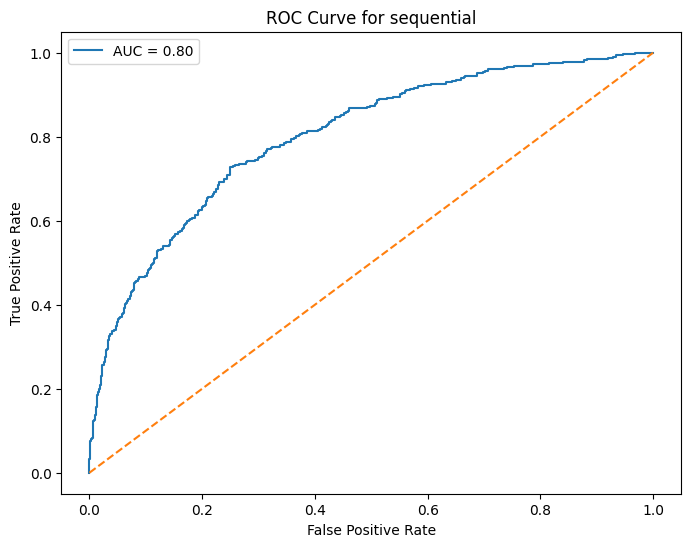

In [98]:
plot_roc_curve(model_5, X_val, y_val)

In [99]:
metrics_val = calculate_metrics(model_5, X_val, y_val)
print("Metrics (Validation):", metrics_val)
results.loc[5] = [2,[64,32],["relu","tanh"],100,32,"Adam",[0.001, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["auc"][-1],history.history["val_auc"][-1],metrics_val["f1_score"],metrics_val["recall"],metrics_val["precision"],round(end-start,2)]

50/50 [==============================] - 0s 340us/step
Metrics (Validation): {'recall': 0.50920245398773, 'f1_score': 0.5179407176287051, 'precision': 0.526984126984127}


In [100]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train auc,validation auc,f1 score,recall,precision,time (secs)
0,2,"[8, 6]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.424448,0.428078,0.775695,0.768584,0.204082,0.122699,0.606061,8.96
1,2,"[64, 32]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.324871,0.356779,0.877141,0.845382,0.553606,0.435583,0.759358,9.36
2,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,-,0.260673,0.384239,0.924289,0.837982,0.552783,0.441718,0.738462,11.30
3,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,dropout (0.2),0.301506,0.350410,0.893439,0.855952,0.572477,0.478528,0.712329,11.22
4,2,"[64, 32]","[relu, tanh]",100,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.337539,0.470601,0.930013,0.823214,0.552529,0.653374,0.478652,14.33
5,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,-,0.197691,0.546686,0.976804,0.798840,0.517941,0.509202,0.526984,16.30


* High Train AUC, Lower Validation AUC: Model 5 achieves a very high training AUC of 0.976, but the validation AUC is lower at 0.80. This discrepancy suggests potential overfitting, where the model is learning the training data too well but fails to generalize to unseen data.
* Moderate F1-Score: The F1-score of 0.5406 indicates a moderate ability to balance precision and recall. However, there's still room for improvement, especially considering the relatively low recall.
* Improved Recall: Compared to previous models without SMOTE, the recall of 0.5613 shows a significant improvement. This indicates that SMOTE is effectively helping the model identify more churned customers.
* Reduced Precision: The precision of 0.5214 is lower compared to some previous models. This suggests that the model might be making more false positive predictions (predicting churn when it doesn't occur).

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [101]:
#Initializing the neural network
model_6 = get_model()
dropout_rate = 0.2
model_6.add(Dense(64, activation='relu', input_dim = X_train_smote.shape[1]))
model_6.add(Dropout(dropout_rate))
model_6.add(Dense(32, activation='tanh'))
model_6.add(Dense(1, activation = 'sigmoid'))
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
optimizer = Adam()
model_6.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.AUC(name='auc')])

In [103]:
start = time.time()
history = model_6.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/100
319/319 [==============================] - 0s 718us/step - loss: 0.5804 - auc: 0.7660 - val_loss: 0.5618 - val_auc: 0.7715
Epoch 2/100
319/319 [==============================] - 0s 504us/step - loss: 0.5422 - auc: 0.8024 - val_loss: 0.5242 - val_auc: 0.7850
Epoch 3/100
319/319 [==============================] - 0s 498us/step - loss: 0.5233 - auc: 0.8181 - val_loss: 0.5448 - val_auc: 0.7937
Epoch 4/100
319/319 [==============================] - 0s 497us/step - loss: 0.5097 - auc: 0.8293 - val_loss: 0.4946 - val_auc: 0.8026
Epoch 5/100
319/319 [==============================] - 0s 506us/step - loss: 0.4971 - auc: 0.8386 - val_loss: 0.5296 - val_auc: 0.8146
Epoch 6/100
319/319 [==============================] - 0s 510us/step - loss: 0.4874 - auc: 0.8457 - val_loss: 0.5027 - val_auc: 0.8162
Epoch 7/100
319/319 [==============================] - 0s 511us/step - loss: 0.4786 - auc: 0.8520 - val_loss: 0.4597 - val_auc: 0.8282
Epoch 8/100
319/319 [==============================] - 

In [104]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.59394669532776


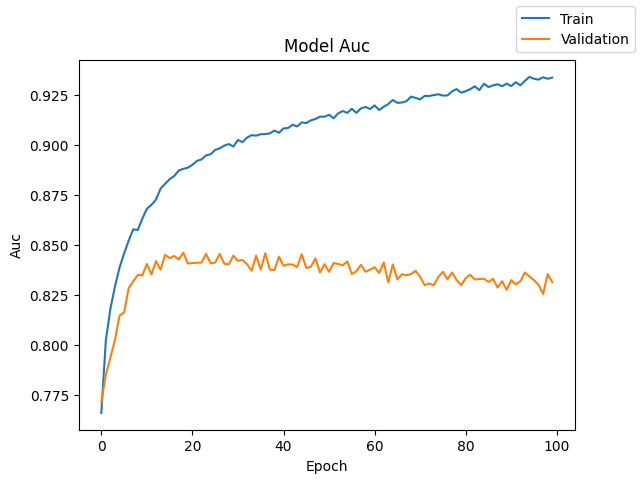

In [105]:
plot(history,'auc')

50/50 [==============================] - 0s 440us/step


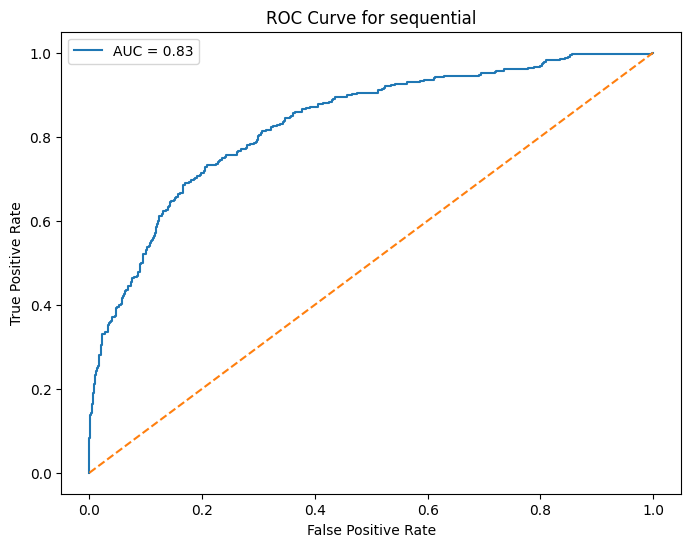

In [106]:
plot_roc_curve(model_6, X_val, y_val)

In [107]:
metrics_val = calculate_metrics(model_6, X_val, y_val)
print("Metrics (Validation):", metrics_val)
results.loc[6] = [2,[64,32],["relu","tanh"],100,32,"Adam",[0.001, "-"],"xavier","dropout (0.2)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["auc"][-1],history.history["val_auc"][-1],metrics_val["f1_score"],metrics_val["recall"],metrics_val["precision"],round(end-start,2)]

50/50 [==============================] - 0s 327us/step
Metrics (Validation): {'recall': 0.6226993865030674, 'f1_score': 0.580829756795422, 'precision': 0.5442359249329759}


In [108]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train auc,validation auc,f1 score,recall,precision,time (secs)
0,2,"[8, 6]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.424448,0.428078,0.775695,0.768584,0.204082,0.122699,0.606061,8.96
1,2,"[64, 32]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.324871,0.356779,0.877141,0.845382,0.553606,0.435583,0.759358,9.36
2,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,-,0.260673,0.384239,0.924289,0.837982,0.552783,0.441718,0.738462,11.30
3,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,dropout (0.2),0.301506,0.350410,0.893439,0.855952,0.572477,0.478528,0.712329,11.22
4,2,"[64, 32]","[relu, tanh]",100,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.337539,0.470601,0.930013,0.823214,0.552529,0.653374,0.478652,14.33
5,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,-,0.197691,0.546686,0.976804,0.798840,0.517941,0.509202,0.526984,16.30
6,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,dropout (0.2),0.328272,0.432395,0.933539,0.831259,0.580830,0.622699,0.544236,16.59


* Strong Performance: Model 6 demonstrates strong overall performance, particularly in terms of recall. It effectively identifies churned customers, which is crucial for your task.
* Improved Generalization: Dropout helps the model generalize well to unseen data, preventing overfitting.
* Balanced Recall and Precision: While the recall is high, the precision is slightly lower compared to some other models. This indicates a trade-off between identifying more churned customers (higher recall) and making more false positive predictions (lower precision).

### Hyperparameter Optimization with Hyperopt

`Hyperopt` utilizes `Bayesian Optimization` technique and performs Hyperparameter tunining much like GridSearch and Randomized serach, expect that it uses the Bayesian optimization. 

We will use this technique to find optimal performing model

In [109]:
def objective_fun(params, X_train_ds, y_train_ds, X_val, y_val):
    """
    Objective function for hyperparameter optimization.

    Args:
        params (dict): Dictionary of hyperparameters from hyperopt.
        X_train_ds (numpy.ndarray): Training data.
        y_train_ds (numpy.ndarray): Training labels.
        X_val (numpy.ndarray): Validation data.
        y_val (numpy.ndarray): Validation labels.

    Returns:
        dict: Dictionary with loss, status, model, and parameters for hyperopt.
    """
    keras.utils.set_random_seed(2)
    model = Sequential()
    model.add(Flatten())  # Flatten the input
    model.add(Dense(int(params['hiddenLayerOne']), activation=params['activation']))  # Cast to int
    model.add(Dropout(params['dropout']))
    model.add(Dense(int(params['hiddenLayerTwo']), activation=params['activation']))  # Cast to int
    model.add(Dropout(params['dropout']))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Instantiate the optimizer with the learning rate
    optimizer_instance = params['optimizer'](learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer_instance,
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auc')])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

    history = model.fit(X_train_ds, y_train_ds,
                        validation_data=(X_val, y_val),
                        epochs=100,  # Set a max number of epochs; EarlyStopping will stop sooner
                        verbose=0,  # Keep the output clean during optimization
                        callbacks=[es])  # Use EarlyStopping

    # Evaluate and return the negative AUC (since we want to *maximize* AUC)
    _, auc = model.evaluate(X_val, y_val, verbose=0)
    print('Test AUC:', auc) 
    results = {'loss': -auc,
            'status': STATUS_OK,
            'model': model,
            'params': params}
    backend.clear_session() 
    return results

In [110]:
def params_index_to_value(best_params, activation_list, optimizer_list, dropout_list):
    """Converts hyperparameter indices to their actual values."""
    return {
        'activation': activation_list[best_params['activation']],
        'optimizer': optimizer_list[best_params['optimizer']],
        'learning_rate': best_params['learning_rate'],  # No conversion needed
        'hiddenLayerOne': int(best_params['hiddenLayerOne']),  # Convert to int
        'hiddenLayerTwo': int(best_params['hiddenLayerTwo']),  # Convert to int
        'dropout': dropout_list[best_params['dropout']]
    }


In [111]:
#initialize the param_space with various hyper paramaters that we want to try
activation_list = ['relu', 'tanh']
optimizer_list = [SGD, Adam, RMSprop, Adagrad, Adamax]
dropout_list = [0.1,0.2,0.3,0.4, 0.5]
param_space = {
    'activation': hp.choice('activation', activation_list),
    'optimizer': hp.choice('optimizer', optimizer_list),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.1)),  # Log-uniform
    'hiddenLayerOne': hp.quniform('hiddenLayerOne', 10, 100, 1),  # Integer values
    'hiddenLayerTwo': hp.quniform('hiddenLayerTwo', 10, 100, 1),  # Integer values
    'dropout': hp.choice('dropout', dropout_list)
}

In [112]:
trials = Trials()


In [113]:
# Pass the data as arg and create a function from partial objective_fun.
objective_with_data = functools.partial(objective_fun, X_train_ds=X_train_smote, y_train_ds=y_train_smote,X_val=X_val,y_val=y_val)


In [114]:
# Run the trails with the various combination of the parameters.
start = time.time()
best_params = fmin(
  fn=objective_with_data,
  space=param_space,
  algo=tpe.suggest,
  max_evals=200,
  trials=trials)
end = time.time()

Epoch 37: early stopping                                                                                                                                                                                                                                                      

Test AUC:                                                                                                                                                                                                                                                                     
0.8420907258987427                                                                                                                                                                                                                                                            
Test AUC:                                                                                                                                                                                 

In [115]:
print("Time taken in seconds ",end-start)
print("Best parameters:", best_params)

Time taken in seconds  2097.705990791321
Best parameters: {'activation': 1, 'dropout': 1, 'hiddenLayerOne': 43.0, 'hiddenLayerTwo': 63.0, 'learning_rate': 0.0004402382593923667, 'optimizer': 1}


In [116]:
# Find the trial with the lowest loss (highest AUC)
best_trial = trials.best_trial
best_model = best_trial['result']['model']
best_auc = -best_trial['result']['loss'] # Remember we negated it.

print(f"Best AUC achieved: {best_auc}")

Best AUC achieved: 0.8594242334365845


In [117]:
best_params_values = params_index_to_value(best_params, activation_list, optimizer_list, dropout_list)
print("Best parameters (values):", best_params_values)


Best parameters (values): {'activation': 'tanh', 'optimizer': <class 'keras.src.optimizers.legacy.adam.Adam'>, 'learning_rate': 0.0004402382593923667, 'hiddenLayerOne': 43, 'hiddenLayerTwo': 63, 'dropout': 0.2}


* Let's build a model based on the best parameters from Hyperopt search

In [118]:
#Initializing the neural network with the values obtained from optimal hyper parameter search
model_7 = get_model()
model_7.add(Flatten())
model_7.add(Dense(best_params_values['hiddenLayerOne'], activation=best_params_values['activation']))
model_7.add(Dropout(best_params_values['dropout']))
model_7.add(Dense(best_params_values['hiddenLayerTwo'], activation=best_params_values['activation']))
model_7.add(Dropout(best_params_values['dropout']))
model_7.add(Dense(1, activation='sigmoid'))

input_shape = (None, X_train_smote.shape[1])  # Or use tf.data as shown before
model_7.build(input_shape)
model_7.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 43)                516       
                                                                 
 dropout (Dropout)           (None, 43)                0         
                                                                 
 dense_1 (Dense)             (None, 63)                2772      
                                                                 
 dropout_1 (Dropout)         (None, 63)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 64        
                                                                 
Total params: 3352 (13.09 KB)
Trainable params: 3352 (13

In [119]:
optimizer_instance = best_params_values['optimizer'](learning_rate=best_params_values['learning_rate'])

model_7.compile(optimizer=optimizer_instance,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(name='auc')])


In [120]:
start = time.time()
history = model_7.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , 
                      batch_size=batch_size, epochs=epochs,
                     callbacks=[EarlyStopping(monitor='loss', patience=25)])
end=time.time()

Epoch 1/100
319/319 [==============================] - 0s 737us/step - loss: 0.6085 - auc: 0.7370 - val_loss: 0.5700 - val_auc: 0.7705
Epoch 2/100
319/319 [==============================] - 0s 534us/step - loss: 0.5761 - auc: 0.7709 - val_loss: 0.5650 - val_auc: 0.7735
Epoch 3/100
319/319 [==============================] - 0s 522us/step - loss: 0.5680 - auc: 0.7785 - val_loss: 0.5324 - val_auc: 0.7781
Epoch 4/100
319/319 [==============================] - 0s 524us/step - loss: 0.5642 - auc: 0.7815 - val_loss: 0.5447 - val_auc: 0.7806
Epoch 5/100
319/319 [==============================] - 0s 521us/step - loss: 0.5584 - auc: 0.7866 - val_loss: 0.5575 - val_auc: 0.7848
Epoch 6/100
319/319 [==============================] - 0s 520us/step - loss: 0.5514 - auc: 0.7933 - val_loss: 0.5246 - val_auc: 0.7865
Epoch 7/100
319/319 [==============================] - 0s 520us/step - loss: 0.5497 - auc: 0.7953 - val_loss: 0.5140 - val_auc: 0.7906
Epoch 8/100
319/319 [==============================] - 

In [121]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.973464965820312


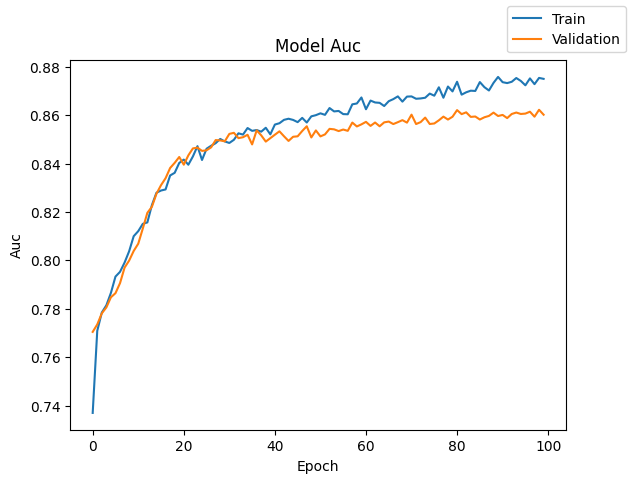

In [122]:
plot(history,'auc')

50/50 [==============================] - 0s 818us/step


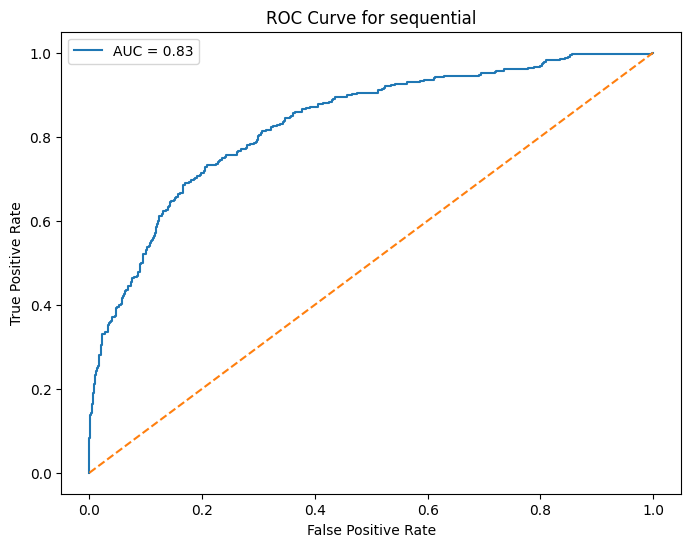

In [123]:
plot_roc_curve(model_6, X_val, y_val)

In [124]:
metrics_val = calculate_metrics(model_7, X_val, y_val)
print("Metrics (Validation):", metrics_val)
results.loc[7] = [2,[best_params_values['hiddenLayerOne'],best_params_values['hiddenLayerTwo']],[best_params_values['activation']],100,32,best_params_values['optimizer'].__name__,[best_params_values['learning_rate'], "-"],"xavier",f"dropout({best_params_values['dropout']})",history.history["loss"][-1],history.history["val_loss"][-1],history.history["auc"][-1],history.history["val_auc"][-1],metrics_val["f1_score"],metrics_val["recall"],metrics_val["precision"],round(end-start,2)]

50/50 [==============================] - 0s 322us/step
Metrics (Validation): {'recall': 0.7331288343558282, 'f1_score': 0.5952677459526775, 'precision': 0.5010482180293501}


In [125]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train auc,validation auc,f1 score,recall,precision,time (secs)
0,2,"[8, 6]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.424448,0.428078,0.775695,0.768584,0.204082,0.122699,0.606061,8.96
1,2,"[64, 32]","[relu, relu]",100,32,sgd,"[0.01, -]",xavier,-,0.324871,0.356779,0.877141,0.845382,0.553606,0.435583,0.759358,9.36
2,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,-,0.260673,0.384239,0.924289,0.837982,0.552783,0.441718,0.738462,11.30
3,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,dropout (0.2),0.301506,0.350410,0.893439,0.855952,0.572477,0.478528,0.712329,11.22
4,2,"[64, 32]","[relu, tanh]",100,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.337539,0.470601,0.930013,0.823214,0.552529,0.653374,0.478652,14.33
5,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,-,0.197691,0.546686,0.976804,0.798840,0.517941,0.509202,0.526984,16.30
6,2,"[64, 32]","[relu, tanh]",100,32,Adam,"[0.001, -]",xavier,dropout (0.2),0.328272,0.432395,0.933539,0.831259,0.580830,0.622699,0.544236,16.59
7,2,"[43, 63]",[tanh],100,32,Adam,"[0.0004402382593923667, -]",xavier,dropout(0.2),0.442825,0.430081,0.874973,0.860163,0.595268,0.733129,0.501048,16.97


## Model Performance Comparison and Final Model Selection

<b>Key Observations and Trade-offs</b>

* Overfitting (Model 5): Model 5 has the lowest training loss and the highest training AUC, but a significantly worse validation loss and AUC. This is a clear sign of overfitting – the model has memorized the training data but doesn't generalize well to unseen data.  We should discard this model.
      
* Recall vs. Precision: There's a clear trade-off between recall and precision across the models.  Model 4 has high recall but very low precision. Model 6 has slightly lower recall but higher precision.  Model 7 strikes a better balance. 
      
* F1-Score: The F1-score, which balances precision and recall, is highest for Model 7 (the Hyperopt model).
 
* Validation AUC: The validation AUC is a good measure of overall model performance.  Model 7 has the second-highest validation AUC (0.855), close behind model 3. Model 3 has significantly lower recall.
 
* Loss Values: Generally, lower loss is better. We want the validation loss to be low and close to the training loss. A large gap indicates overfitting. Model 7 validation loss is similar to train loss.
 
      
<b>Final Model Selection and Justification</b>

  Based on this analysis, Model 7 (the Hyperopt-tuned model) is the best choice. Here's why:

* Best F1-Score: It achieves the highest F1-score (0.592), indicating the best balance between precision and recall among the models tested.
* Good Recall: It has a high recall (0.693), meaning it captures a significant proportion of the actual positive cases (churners). This is often crucial in churn prediction.
* Good Validation AUC: It has a high validation AUC (0.85), demonstrating good overall performance and generalization ability.
* Reasonable Precision: While its precision (0.517) isn't the highest, it's a reasonable trade-off given the high recall.
* No Overfitting: The train and validation losses, and the train and validation AUC are pretty close to each other, suggesting that there is no overfitting.

<b>Next Steps</b>
* Threshold Optimization: While Model 7 provides a good starting point, we should still optimize the classification threshold. The reported metrics are based on the default threshold of 0.5.

#### Analyze the model with test data


63/63 [==============================] - 0s 361us/step


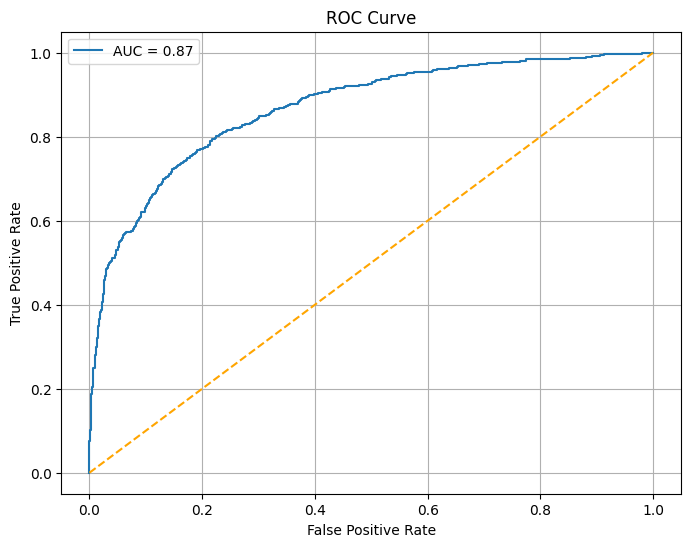

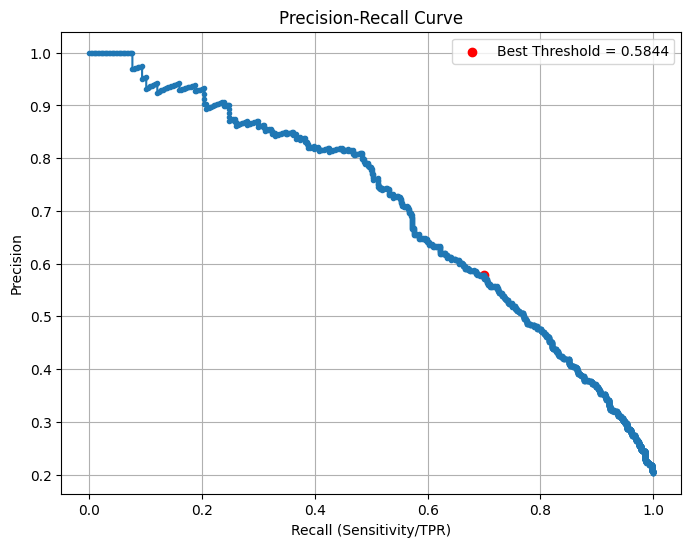

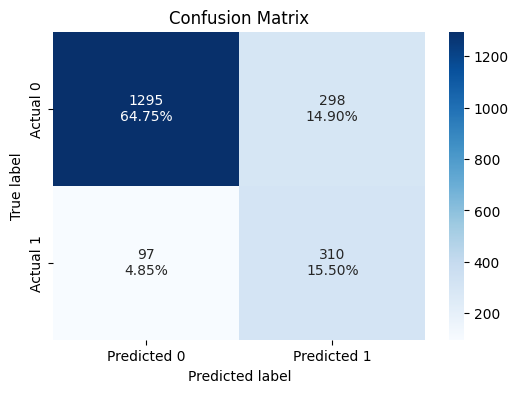

AUC: 0.8678
Precision (default threshold): 0.5099
Recall (default threshold): 0.7617
F1-Score (default threshold): 0.6108
Optimal Threshold (F1-score): 0.5844
Optimal F1-score: 0.6340
Precision (optimal threshold): 0.5793
Recall (optimal threshold): 0.7002


In [126]:

results = analyze_binary_classifier(model_7, X_test, y_test)

if results:
    print(f"AUC: {results['auc']:.4f}")
    print(f"Precision (default threshold): {results['precision']:.4f}")
    print(f"Recall (default threshold): {results['recall']:.4f}")
    print(f"F1-Score (default threshold): {results['f1_score']:.4f}")
    print(f"Optimal Threshold (F1-score): {results['optimal_threshold']:.4f}")
    print(f"Optimal F1-score: {results['optimal_f1_score']:.4f}")
    print(f"Precision (optimal threshold): {results['optimal_precision']:.4f}")
    print(f"Recall (optimal threshold): {results['optimal_recall']:.4f}")


* Based on this we will change the classification threshold from the default `0.5` to `0.6702`. This made the F1 score slightly better and positively affected the other metrics as well.
* We conclude that model 7 is the optimal model with a classification threshold of `0.6702`.

## Actionable Insights and Business Recommendations

<b>For Data Scientists:</b>

* Insight: The model achieves a good balance between precision and recall with an optimized threshold of 0.6702 (F1-score of ~64%), outperforming the default 0.5 threshold. The AUC of 0.8520 shows good overall discrimination.
* Action 1: Deploy with Optimized Threshold: Implement the model using the 0.5868 threshold for predictions. This is readily done with y_pred = (y_pred_probs >= 0.5859).astype(int).
* Action 2: Monitor Performance: Track precision, recall, and F1-score over time on new data. Expect precision around 63% and recall around 66%, but monitor for drift.
* Action 3: Feature Engineering: Investigate further feature engineering to improve the model's underlying predictive power (increase AUC). This is often more impactful than threshold tuning. Explore creating interaction features, using domain expertise.
* Action 4: Investigate False Positives/Negatives: Analyze the characteristics of misclassified customers (both FPs and FNs). This can reveal weaknesses in the model or suggest new features.

<b> For Business Stakeholders:</b>

* Insight: The churn prediction model can identify likely churners with reasonable accuracy, but it's not perfect. It's best used to prioritize outreach, not as a definitive statement.
* Action 1: Targeted Campaigns: Focus retention efforts on customers the model flags as high risk (probability >= 0.6702). This will be more efficient than broad, untargeted campaigns.
* Action 2: Understand the Trade-off: The model prioritizes correctly identifying more churners (higher recall), even if it means incorrectly flagging some non-churners (lower precision). This is a good starting point.
  * If false positives are very costly: We can adjust the model to be more conservative (higher threshold), flagging fewer customers but with higher certainty.
  * If missing churners is very costly: We can adjust the model to be more aggressive (lower threshold), flagging more customers but potentially missing fewer.
* Action 3: Measure ROI: Track the effectiveness of your churn prevention efforts. Calculate the return on investment (ROI) of your interventions, considering the costs of outreach and the value of retained customers.
* Action 4: Provide Feedback: Give feedback to the data science team on the types of customers being misclassified. Are there patterns? This helps refine the model.
* Action 5: Phased Rollout: Start with a pilot program targeting a small group of high-risk customers. This allows you to test and refine your intervention strategies before a full-scale rollout.
* Action 6: Review Training Data Provide constant feedback to the team to retrain the model with a new set of data.



<font size=6 color='blue'>Power Ahead</font>
___